<a href="https://colab.research.google.com/github/Saptasindhu07/Linear-Regression/blob/main/Multivariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [ ]:
data=pd.read_csv('house_price_dataset.csv')
data.head()

,Size,Bedrooms,Bathrooms,Age,DistanceToCity,LotSize,SchoolQuality,Price
0,1852.34,3.24,2.12,15.43,5.72,5321.45,7.83,352124.64
1,2431.76,4.12,2.81,22.34,3.21,6723.87,8.24,483672.12
2,1624.91,2.93,1.94,10.23,8.45,4512.76,6.54,298543.23
3,3124.65,5.02,3.24,30.12,2.14,8214.32,9.13,612345.78
4,2043.87,3.56,2.34,18.76,6.34,5921.67,7.23,387654.91


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Size            366 non-null    float64
 1   Bedrooms        366 non-null    float64
 2   Bathrooms       366 non-null    float64
 3   Age             366 non-null    float64
 4   DistanceToCity  366 non-null    float64
 5   LotSize         366 non-null    float64
 6   SchoolQuality   366 non-null    float64
 7   Price           366 non-null    float64
dtypes: float64(8)
memory usage: 23.0 KB


In [ ]:
data.corr()

,Size,Bedrooms,Bathrooms,Age,DistanceToCity,LotSize,SchoolQuality,Price
Size,1.000000,0.956716,0.949704,0.897928,-0.750240,0.957942,0.909422,0.945311
Bedrooms,0.956716,1.000000,0.988872,0.947244,-0.863293,0.978843,0.934958,0.981097
Bathrooms,0.949704,0.988872,1.000000,0.950607,-0.847596,0.978015,0.912371,0.977446
Age,0.897928,0.947244,0.950607,1.000000,-0.920227,0.971174,0.882817,0.969825
DistanceToCity,-0.750240,-0.863293,-0.847596,-0.920227,1.000000,-0.868476,-0.873303,-0.914687
LotSize,0.957942,0.978843,0.978015,0.971174,-0.868476,1.000000,0.899865,0.977581
SchoolQuality,0.909422,0.934958,0.912371,0.882817,-0.873303,0.899865,1.000000,0.955805
Price,0.945311,0.981097,0.977446,0.969825,-0.914687,0.977581,0.955805,1.000000


In [ ]:
X=data.iloc[:,0:7:1]


,Size,Bedrooms,Bathrooms,Age,DistanceToCity,LotSize,SchoolQuality
0,1852.34,3.24,2.12,15.43,5.72,5321.45,7.83
1,2431.76,4.12,2.81,22.34,3.21,6723.87,8.24
2,1624.91,2.93,1.94,10.23,8.45,4512.76,6.54
3,3124.65,5.02,3.24,30.12,2.14,8214.32,9.13
4,2043.87,3.56,2.34,18.76,6.34,5921.67,7.23
...,...,...,...,...,...,...,...
361,3012.34,3.34,2.12,11.45,13.12,5321.45,7.67
362,4845.67,8.23,6.45,61.67,0.00,14221.67,10.00
363,3401.23,5.89,3.12,19.56,8.45,8321.89,8.34
364,4234.56,7.23,5.45,37.45,1.23,11621.45,10.00


In [ ]:
y=data.loc[:,['Price']]
y

,Price
0,352124.64
1,483672.12
2,298543.23
3,612345.78
4,387654.91
...,...
361,352345.67
362,932345.67
363,462345.67
364,812345.67


<Axes: xlabel='Size', ylabel='Price'>

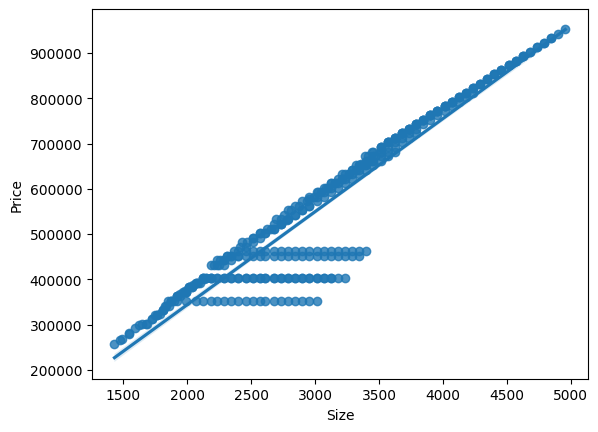

In [ ]:
import seaborn as sns
sns.regplot(x=data['Size'],y=data['Price'])

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)
scaler=StandardScaler()


In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

X_train

array([[-0.6683488 , -0.88712312, -0.78053507, ...,  1.17146597,
        -0.79552076, -0.906552  ],
       [-1.31949726, -1.11096876, -1.06459112, ...,  0.60870593,
        -0.9194395 , -1.22296519],
       [-2.01240243, -1.67419327, -1.54662562, ...,  1.26432138,
        -1.66304281, -2.82420765],
       ...,
       [ 1.26712972,  1.21413756,  1.22507276, ..., -1.36095422,
         1.39357399,  1.22204576],
       [-0.46110808, -0.88712312, -0.78053507, ...,  1.452846  ,
        -0.7955662 , -0.906552  ],
       [-0.59923123, -0.46831515, -0.39318592, ...,  0.67060954,
        -0.54763785, -0.47507948]])

In [ ]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
validation_score= cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
validation_score

array([-9.45846278e+07, -1.71146951e+08, -8.60109162e+07, -1.12996900e+08,
       -1.02223020e+08])

In [ ]:
y_pred=lr.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
mean_squared_error(y_test,y_pred)

99398582.48243003

In [ ]:
mean_absolute_error(y_test,y_pred)

8137.865674724356

In [ ]:
root_mean_squared_error(y_test,y_pred)


9969.883774770396

In [ ]:
r2_score(y_test,y_pred)

0.9967807678151551

In [ ]:
adjusted_r2=1-(1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_r2

0.9964393340985807

**CHECKING THE ASSUMPTIONS OF LINEAR REGRESSION**

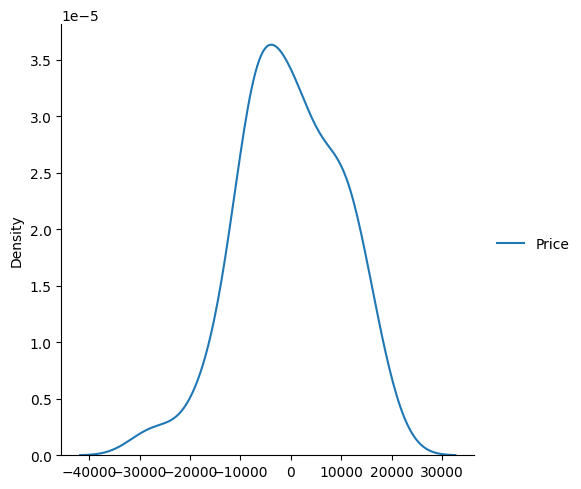

In [ ]:
residuals=y_test-y_pred
sns.displot(y_test-y_pred, kind='kde')

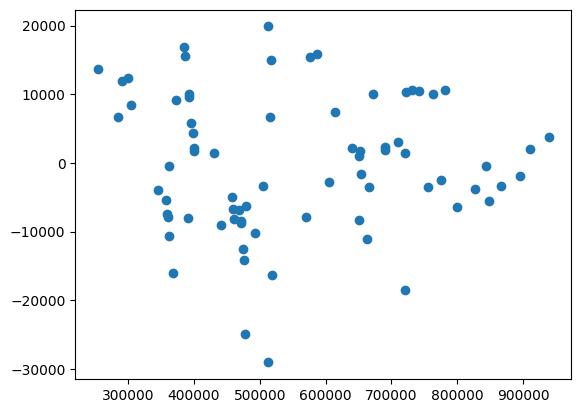

In [ ]:
plt.scatter(y_pred,residuals)